# Kelompok Ok Gas Health Admission

- Muhammad Fachrudin Firdaus - 2206819331
- Muhammad Hilal Darul F. - 2206830542
- Muhammad Mariozulfandy - 2206041404
- Patrick Samuel Evans S. - 2206028251

# Dataset

Dataset berisikan informasi umum, diagnosa penyakit, hasil lab, dan data pasien selama dirawat di rumah sakit

56 Kolom x 12551 baris

- SNO : Serial Number (unique)
- MRD No. : Admission Number
- D.O.A  : Date of Admission
- D.O.D   : Date of Discharge
- AGE     : Age patient
- GENDER  : Gender patient (F (Female)/M (Male)
- RURAL   : Household are of patient ( U (Urban)/ R (Rural))
- TYPE OF ADMISSION-EMERGENCY/OPD  : O (Outpatient)/E (Emergency)
- month year   : Month and year of admission
- DURATION OF STAY   : How long the patient stay in hospital
- duration of intensive unit stay  : How long the patient do intensive stay in hospital
- SMOKING : Is patient smoke? (1 (True)/ 0(False))
- ALCOHOL  : Is patient drink alcohol? (1 (True)/ 0(False))
- DM   : Diabetes Mellitus
- HTN : Hypertension
- CAD : Coronary Artery Disease
- PRIOR CMP : CARDIOMYOPATHY
- CKD  : CHRONIC KIDNEY DISEASE
- TLC  : TOTAL LEUKOCYTES COUNT
- PLATELETS : Platelets on patient
- GLUCOSE : Glucose on patient
- UREA  
- CREATININE  : Creatinine on patient
- BNP   : B-TYPE NATRIURETIC PEPTIDE
- RAISED CARDIAC ENZYMES
- EF    : Ejection Fraction
- SEVERE ANAEMIA
- ANAEMIA   
- STABLE ANGINA  
- ACS   : Acute coronary Syndrome
- STEMI  : ST ELEVATION MYOCARDIAL INFARCTION
- ATYPICAL CHEST PAIN  
- HEART FAILURE    
- HFREF  : HEART FAILURE WITH REDUCED EJECTION FRACTION
- HFNEF  : HEART FAILURE WITH NORMAL EJECTION FRACTION
- VALVULAR  : Valvular Heart Disease
- CHB  : Complete Heart Block
- SSS  : Sick sinus syndrome
- AKI  : ACUTE KIDNEY INJURY
- CVA INFRACT  : Cerebrovascular Accident INFRACT
- CVA BLEED  : Cerebrovascular Accident BLEED
- AF  : Atrial Fibrilation
- VT  : Ventricular Tachycardia
- PSVT : PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA
- CONGENITAL : Congenital Heart Disease
- UTI  : Urinary tract infection
- NEURO CARDIOGENIC SYNCOPE
- ORTHOSTATIC
- INFECTIVE ENDOCARDITIS
- DVT  : Deep venous thrombosis
- CARDIOGENIC SHOCK
- SHOCK  
- PULMONARY EMBOLISM   
- CHEST INFECTION  
- OUTCOME  : outcome the patient (Discharge / DAMA (Discharged Against Medical Advice)/ Expiry)
- HB : Hemoglobin

# Import Package

In [73]:
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import AdaBoostRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Data Eksplorasi

In [92]:
df = pd.read_csv('/content/sample_data/admission.csv')

## Pada bulan apakah jumlah pasien terbanyak yang dirawat di rumah sakit?

In [75]:
# Preprocess
df.replace('EMPTY', np.nan, inplace=True)
df.replace('\\', np.nan, inplace=True)
df.replace('NILL', np.nan, inplace=True)
df['PLATELETS'] = df['PLATELETS'].astype('float64')
df['GLUCOSE'] = df['GLUCOSE'].astype('float64')
df['UREA'] = df['UREA'].astype('float64')
df['BNP'] = df['BNP'].astype('float64')
df['EF'] = df['EF'].astype('float64')
df['CHEST INFECTION'] = df['CHEST INFECTION'].astype('float64')
df['CREATININE'] = df['CREATININE'].astype('float64')
df['HB'] = df['HB'].astype('float64')
df['TLC'] = df['TLC'].astype('float64')

Jumlah pasien di bulan 1 adalah 1289
Jumlah pasien di bulan 2 adalah 1148
Jumlah pasien di bulan 3 adalah 1094
Jumlah pasien di bulan 4 adalah 772
Jumlah pasien di bulan 5 adalah 956
Jumlah pasien di bulan 6 adalah 940
Jumlah pasien di bulan 7 adalah 962
Jumlah pasien di bulan 8 adalah 908
Jumlah pasien di bulan 9 adalah 1023
Jumlah pasien di bulan 10 adalah 1083
Jumlah pasien di bulan 11 adalah 1169
Jumlah pasien di bulan 12 adalah 1207


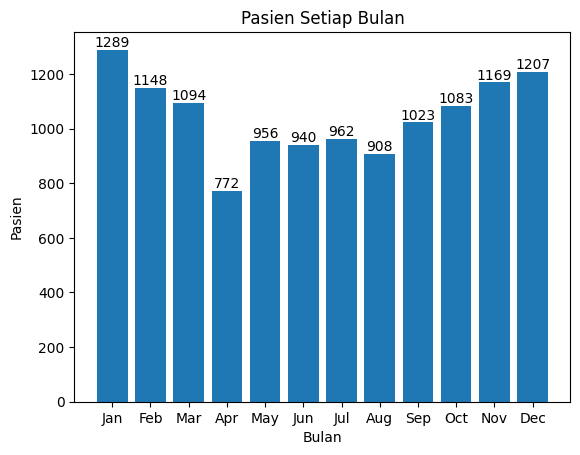

In [76]:
# show
df['month year'] = pd.to_datetime(df['month year'], format='%b-%y')
df['month'] = df['month year'].dt.month
month_counts = df['month year'].dt.month.value_counts().sort_index()
month_array = [month_counts.get(x, 0) for x in range(1, 13)]
counter = 1
for i in month_array:
    print(f"Jumlah pasien di bulan {counter} adalah {i}")
    counter+=1

months = range(1, len(month_array) + 1)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(months, month_array)

plt.xlabel('Bulan')
plt.ylabel('Pasien')
plt.title('Pasien Setiap Bulan')

plt.xticks(months, month_names)

for month, count in zip(months, month_array):
    plt.text(month, count, str(count), ha='center', va='bottom')

plt.show()

Bulan dengan pasien terbanyak adalah bulan Januari.

## Bagaimana karakteristik pasien yang menderita heart failure?

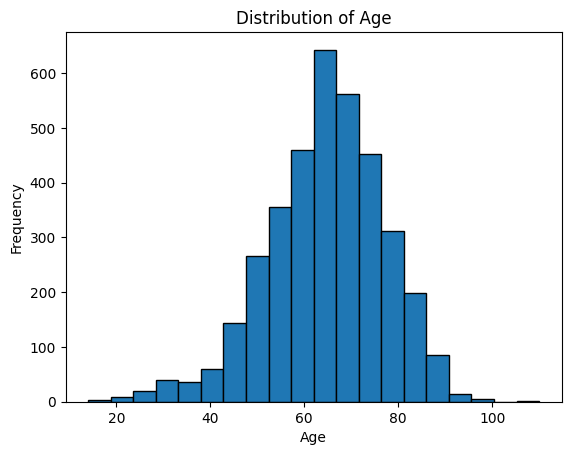

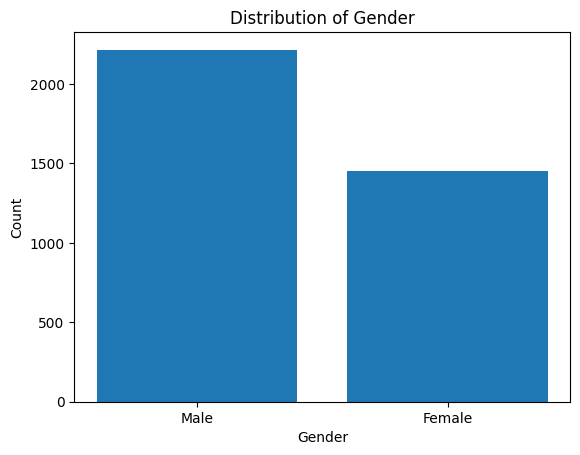

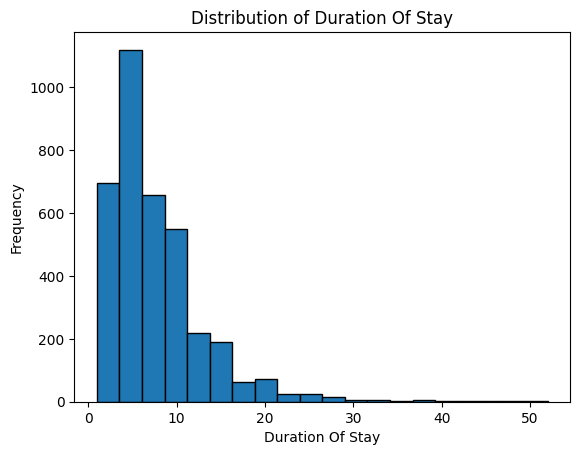

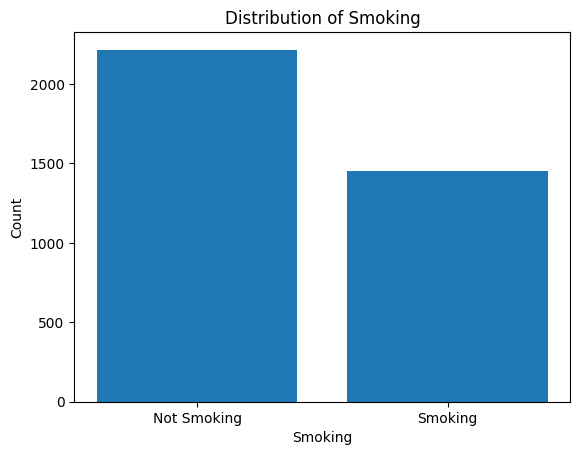

In [77]:
heart_failure_data = df[df[['HEART FAILURE']].sum(axis=1) == 1]
heart_failure_characteristics = heart_failure_data.describe(include='all')[['AGE', 'GENDER', 'RURAL', 'HB', 'DURATION OF STAY']]
heart_failure_data = df[df['HEART FAILURE'] == 1]
non_heart_failure_data = df[df['HEART FAILURE'] == 0]
# EDA Sakit Jantung
plt.hist(heart_failure_data['AGE'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

gender_counts = heart_failure_data['GENDER'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

plt.hist(heart_failure_data['DURATION OF STAY'], bins=20, edgecolor='black')
plt.xlabel('Duration Of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Of Stay')
plt.show()

smoking_counts = heart_failure_data['SMOKING '].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smoking')
plt.xticks([0, 1], ['Not Smoking', 'Smoking'])
plt.show()


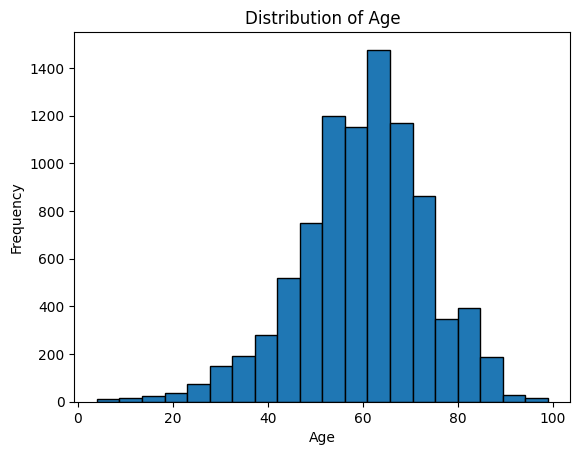

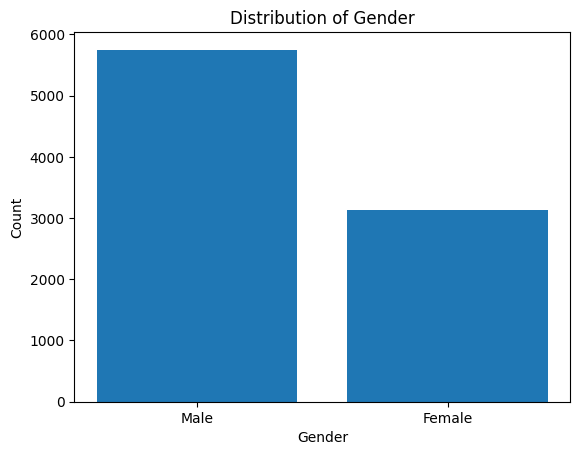

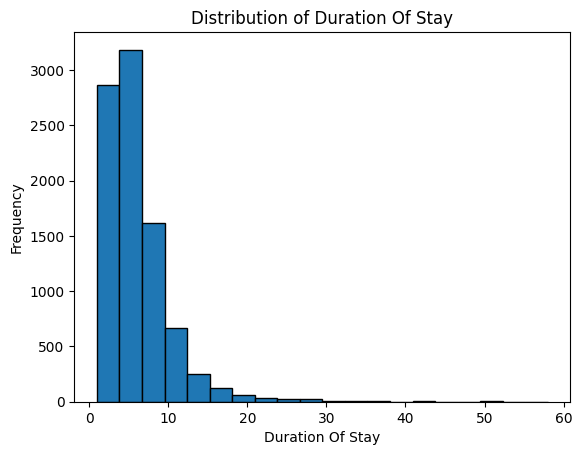

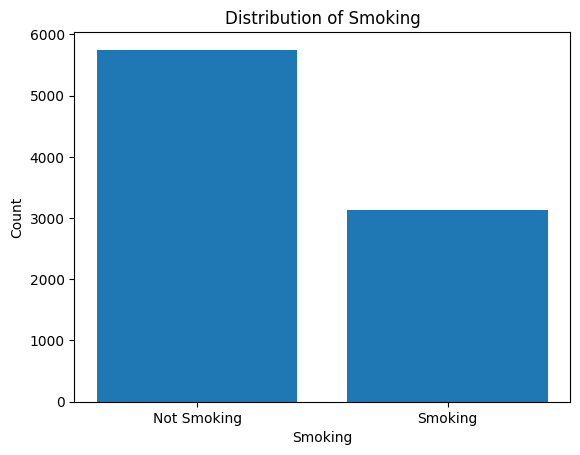

In [78]:
# EDA Tidak Sakit Jantung
plt.hist(non_heart_failure_data['AGE'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

gender_counts = non_heart_failure_data['GENDER'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

plt.hist(non_heart_failure_data['DURATION OF STAY'], bins=20, edgecolor='black')
plt.xlabel('Duration Of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Of Stay')
plt.show()

smoking_counts = non_heart_failure_data['SMOKING '].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smoking')
plt.xticks([0, 1], ['Not Smoking', 'Smoking'])
plt.show()

Dapat dilihat bahwa rokok tidak terlalu signifikan dalam mempengaruhi sakit jantung.

## Penyakit apa yang terbanyak diderita pasien yang berumur 19 - 25 tahun?

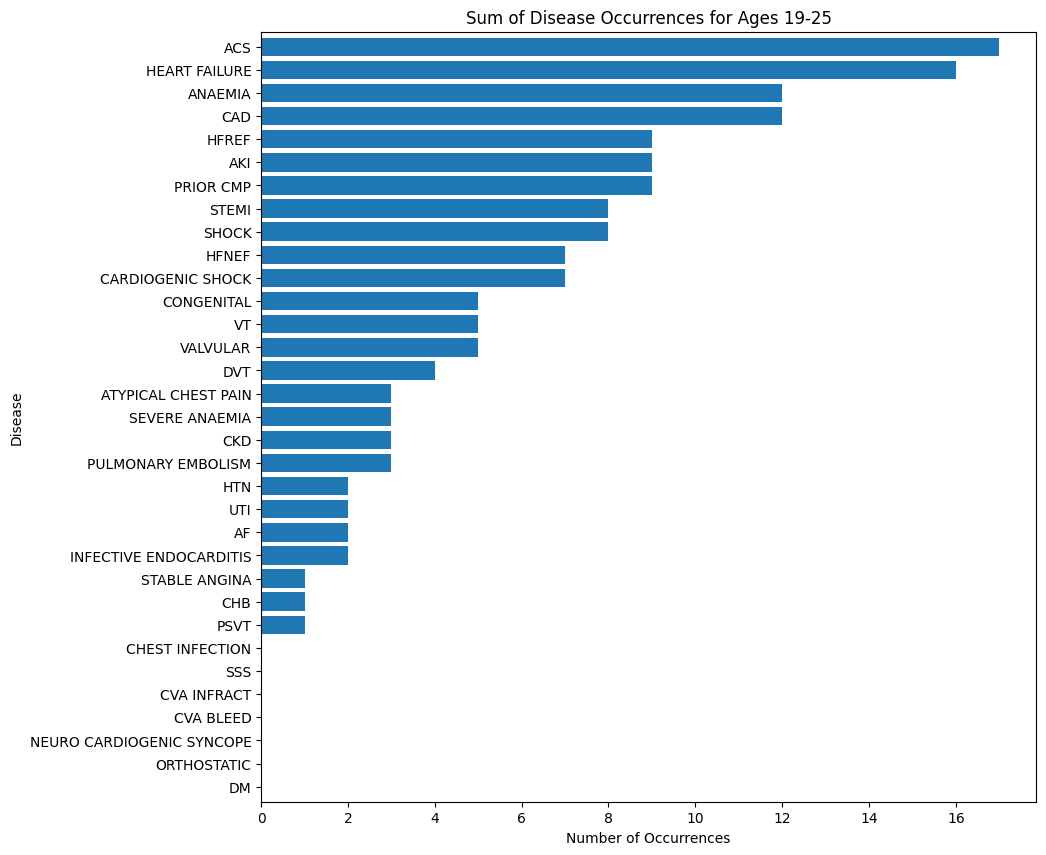

In [79]:
age_filtered_data = df[(df['AGE'] >= 19) & (df['AGE'] <= 25)]

disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()

age_filtered_data.loc[:, 'CHEST INFECTION'] = pd.to_numeric(age_filtered_data['CHEST INFECTION'], errors='coerce')

column_sums = age_filtered_data[disease_columns].sum()
column_sums = column_sums.sort_values()

plt.figure(figsize=(10, 10))
column_sums.plot(kind='barh', width=0.8)
plt.xlabel('Number of Occurrences')
plt.ylabel('Disease')
plt.title('Sum of Disease Occurrences for Ages 19-25')
plt.show()

Penyakit yang paling umum ditemui pada pasien dengan usia 19-25 tahun adalah Acute Coronary Syndrome.

## Apakah pasien yang memiliki kebiasan merokok dan tinggal di daerah urban memiliki rata-rata komplikasi penyakit yang lebih banyak dibandingkan pasien yang memiliki kebiasan merokok dan tinggal di daerah rural? (komplikasi penyakit dapat diketahui dari jumlah penyakit yang diderita suatu pasien)

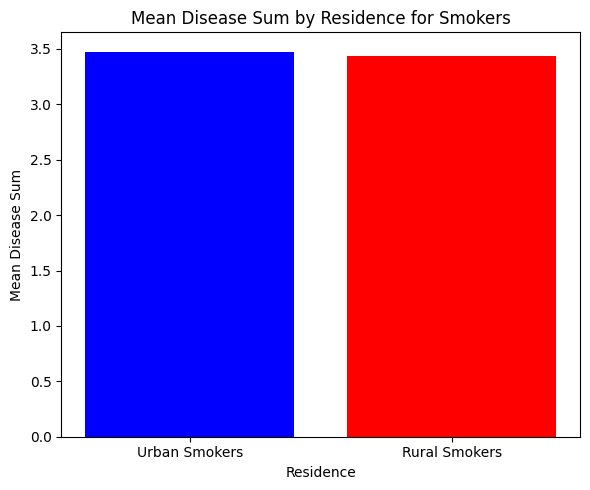

In [80]:
urban_smoke = df[(df['SMOKING '] == 1) & (df['RURAL'] == "U")].copy()
rural_smoke = df[(df['SMOKING '] == 1) & (df['RURAL'] == "R")].copy()

disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()

urban_smoke.loc[:, 'CHEST INFECTION'] = pd.to_numeric(urban_smoke['CHEST INFECTION'], errors='coerce')
rural_smoke.loc[:, 'CHEST INFECTION'] = pd.to_numeric(rural_smoke['CHEST INFECTION'], errors='coerce')

urban_smoke['disease_sum'] = urban_smoke[disease_columns].sum(axis=1)
rural_smoke['disease_sum'] = rural_smoke[disease_columns].sum(axis=1)

urban_mean = urban_smoke['disease_sum'].mean()
rural_mean = rural_smoke['disease_sum'].mean()

data = [urban_mean, rural_mean]
labels = ["Urban Smokers", "Rural Smokers"]

plt.figure(figsize=(6, 5))
plt.bar(labels, data, color=['blue', 'red'])
plt.xlabel("Residence")
plt.ylabel("Mean Disease Sum")
plt.title("Mean Disease Sum by Residence for Smokers")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Pasien di daerah urban dan merokok memiliki rata-rata komplikasi yang lebih besar dibandingkan dengan pasien di daerah rural dan merokok. Akan tetapi, angka dari perbedaan rata-rata tidak signifikan.

## Apakah ada hubungan antara jenis emergensi perawatan dengan durasi pasien dirawat di rumah sakit?

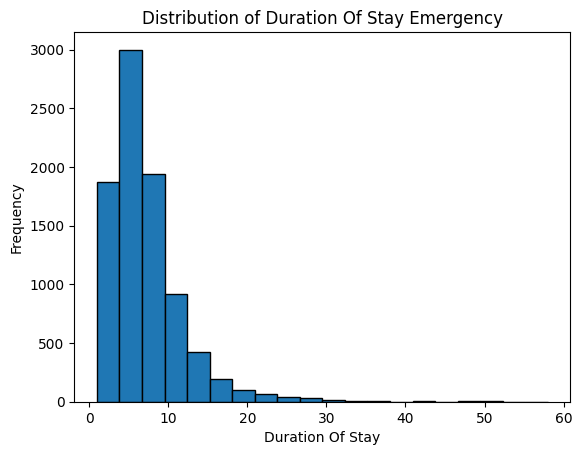

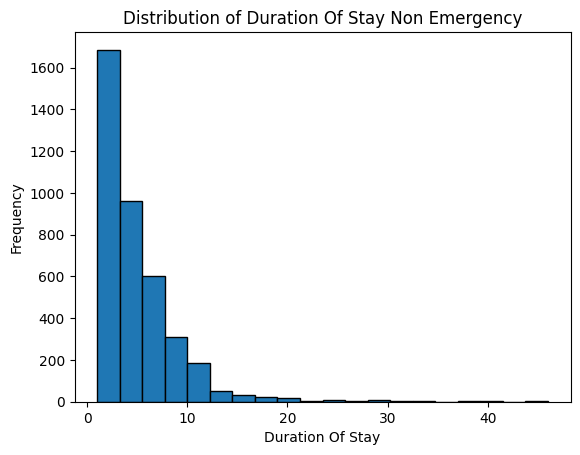

In [81]:
emergency_data = df[df['TYPE OF ADMISSION-EMERGENCY/OPD'] == 'E']
non_emergency_data = df[df['TYPE OF ADMISSION-EMERGENCY/OPD'] == 'O']

plt.hist(emergency_data['DURATION OF STAY'], bins=20, edgecolor='black')
plt.xlabel('Duration Of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Of Stay Emergency')
plt.show()

plt.hist(non_emergency_data['DURATION OF STAY'], bins=20, edgecolor='black')
plt.xlabel('Duration Of Stay')
plt.ylabel('Frequency')
plt.title('Distribution of Duration Of Stay Non Emergency')
plt.show()

## Apa penyakit yang memiliki tingkat fatalitas tertinggi?

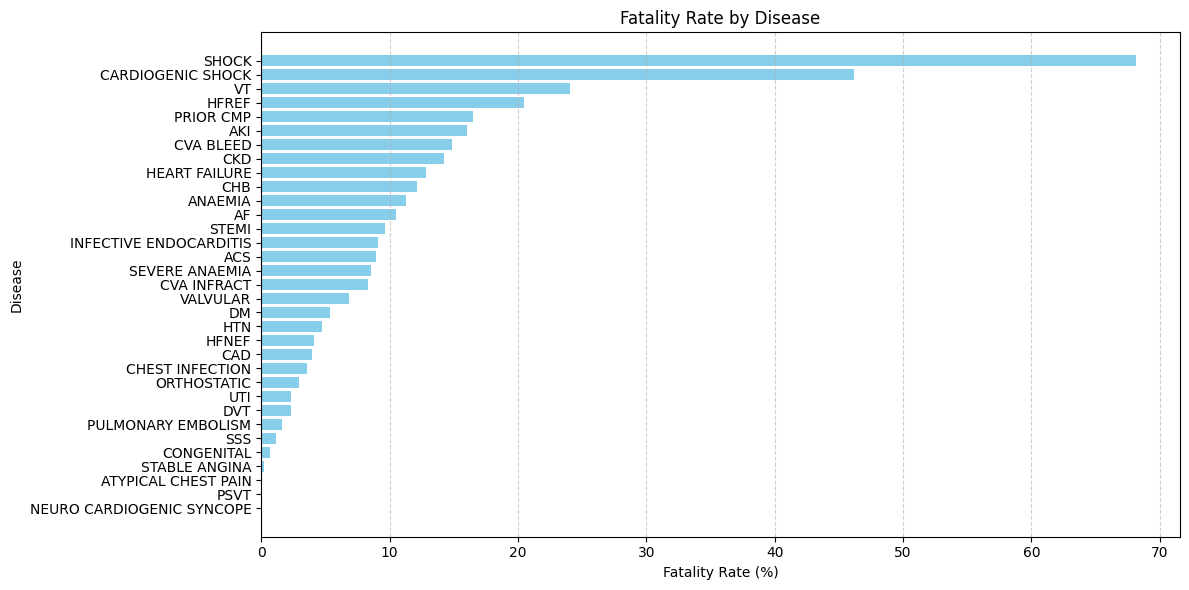

In [82]:
disease_columns = df.columns[df.columns.get_loc('DM'):df.columns.get_loc('CKD')+1].tolist()
disease_columns += df.columns[df.columns.get_loc('SEVERE ANAEMIA'):df.columns.get_loc('CHEST INFECTION')+1].tolist()

total_patients = df.shape[0]
deaths = df[df['OUTCOME'] == 'EXPIRY'].shape[0]

disease_fatality_rates = {}
for disease in disease_columns:
  disease_patients = df[df[disease] == 1].shape[0]
  if disease_patients > 0:
    disease_fatality_rates[disease] = (df[(df[disease] == 1) & (df['OUTCOME'] == 'EXPIRY')].shape[0] / disease_patients) * 100
  else:
    disease_fatality_rates[disease] = 0

diseases = list(disease_fatality_rates.keys())
fatality_rates = list(disease_fatality_rates.values())

sorted_data = sorted(zip(diseases, fatality_rates), key=lambda x: x[1], reverse=True)
diseases, fatality_rates = zip(*sorted_data)

plt.figure(figsize=(12, 6))
plt.barh(diseases, fatality_rates, color='skyblue')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Disease')
plt.title('Fatality Rate by Disease')
plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

# Task

## Regresi

### Preprocessing

In [83]:
# Load the data
train_df = pd.read_csv('/content/sample_data/train_reg.csv')
test_df = pd.read_csv('/content/sample_data/test_reg.csv')

# Drop useless column
train_df.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D'], inplace=True)
test_df.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D'], inplace=True)

# Encoding
train_df['GENDER'] = train_df['GENDER'].map({'M': 1, 'F': 0})
test_df['GENDER'] = test_df['GENDER'].map({'M': 1, 'F': 0})

train_df['RURAL'] = train_df['RURAL'].map({'R': 1, 'U': 0})
test_df['RURAL'] = test_df['RURAL'].map({'R': 1, 'U': 0})

train_df['TYPE OF ADMISSION-EMERGENCY/OPD'] = train_df['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 1, 'O': 0})
test_df['TYPE OF ADMISSION-EMERGENCY/OPD'] = test_df['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 1, 'O': 0})

# Convert object column to numeric
columns_to_convert = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'CHEST INFECTION', 'HB']
train_df['CHEST INFECTION'].replace({'\\': pd.NA}, inplace=True)
test_df['CHEST INFECTION'].replace({'\\': pd.NA}, inplace=True)

for col in columns_to_convert:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

# Separate month and year
train_df[['month', 'year']] = train_df['month year'].str.split('-', expand=True)
test_df[['month', 'year']] = test_df['month year'].str.split('-', expand=True)

# Month and year as int
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

train_df['year'] = train_df['year'].astype(int)
test_df['year'] = test_df['year'].astype(int)

train_df['month'] = train_df['month'].map(month_mapping)
test_df['month'] = test_df['month'].map(month_mapping)

train_df.drop(['month year'], axis=1, inplace=True)
test_df.drop(['month year'], axis=1, inplace=True)

# Mapping outcome
outcome_mapping = {
    'DAMA': 0,
    'DISCHARGE': 1,
    'EXPIRY': 2
}
train_df['OUTCOME'] = train_df['OUTCOME'].map(outcome_mapping)
test_df['OUTCOME'] = test_df['OUTCOME'].map(outcome_mapping)

# fill na with median
train_df = train_df.fillna(train_df.median())
test_df = test_df.fillna(test_df.median())

# Independent and dependent variable
X = train_df.drop(columns=['duration of intensive unit stay'])
y = train_df['duration of intensive unit stay']

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [84]:
# Define the models
models = {
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'adaboost': AdaBoostRegressor(),
    'catboost': CatBoostRegressor(verbose=0),
    'xgboost': XGBRegressor()
}

# Define the hyperparameters for each model
param_grid = {
    'linear_regression': {},
    'ridge': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'decision_tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'adaboost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'catboost': {
        'iterations': [100, 200, 300],
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1]
    },
    'xgboost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1]
    }
}

# Perform hyperparameter tuning using RandomizedSearchCV
best_models = {}
for name, model in models.items():
    if param_grid[name]:  # Only perform search if there are parameters to tune
        search = RandomizedSearchCV(model, param_grid[name], n_iter=10, scoring='r2', cv=5, verbose=1, random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_models[name] = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_models[name] = model

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate the best models
results = {}
for name, model in best_models.items():
    predicted = model.predict(X_val)
    r2 = r2_score(y_val, predicted)
    mae = mean_absolute_error(y_val, predicted)
    mse = mean_squared_error(y_val, predicted)
    rmse = np.sqrt(mse)

    results[name] = {
        'R_squared': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for ridge: {'alpha': 10.0}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for lasso: {'alpha': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for decision_tree: {'min_samples_split': 10, 'max_depth': 10}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for random_forest: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': 30}
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for adaboost: {'n_estimators': 50, 'learning_rate': 0.01}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for catboost: {'learning_rate': 0.1, 'iterations': 300, 'depth': 6}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for xgboost: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05}
                   R_squared       MAE       MSE      RMSE
linear_regression   0.622189  1.559608  5.527651  2.351096
ridge               0.622809  1.557078  5.518583  2.349166
lasso               0.616477  1.569595  5.611225  2.368802
decision_tree       0.546113  1.572977  6.640701  2.576956
random_forest       0.645944  1.431090  5.180091  2.275981
adaboost            0.574033  1.746618  6.232208  2.496439
catboost            0.655253  1.454391  5.043896  2.245862
xgboost             0.623223  1.497932  5.512526  2.347877


### Train best model and submission

In [85]:
# Select the best model based on R_squared value
best_model_name = results_df['R_squared'].idxmax()
best_model = best_models[best_model_name]

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_final = best_model.predict(test_df)

# Ensure the predictions are integers
y_pred_final = y_pred_final.astype(int)

submit = pd.read_csv('/content/sample_data/test_reg.csv')
submit = submit[["SNO"]]
submit["duration of intensive unit stay"] = y_pred_final

submit.to_csv('submission_regresi.csv', index=False)

## Klasifikasi

### Preprocessing

In [86]:
# Load data
train = pd.read_csv('/content/sample_data/train_class.csv')
test = pd.read_csv('/content/sample_data/test_class.csv')

# Drop Admission Number karena tidak berisi informasi apapun
train.drop(['MRD No.'],axis=1, inplace=True)
test.drop(['MRD No.'],axis=1, inplace=True)

# Drop Serial Number karena tidak berisi informasi apapun
train.drop(['SNO'],axis=1, inplace=True)
test.drop(['SNO'],axis=1, inplace=True)

# Drop D.O.A karena sudah direpresentasikan melalui kolom lain
train.drop(['D.O.A'],axis=1, inplace=True)
test.drop(['D.O.A'],axis=1, inplace=True)

# Drop D.O.D karena sudah direpresentasikan melalui kolom lain
train.drop(['D.O.D'],axis=1, inplace=True)
test.drop(['D.O.D'],axis=1, inplace=True)

# Encoding
train['GENDER'] = train['GENDER'].map({'M': 1, 'F': 0})
test['GENDER'] = test['GENDER'].map({'M': 1, 'F': 0})
train['RURAL'] = train['RURAL'].map({'R': 1, 'U': 0})
test['RURAL'] = test['RURAL'].map({'R': 1, 'U': 0})
train['TYPE OF ADMISSION-EMERGENCY/OPD'] = train['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 1, 'O': 0})
test['TYPE OF ADMISSION-EMERGENCY/OPD'] = test['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 1, 'O': 0})

# Change object column to float
train.loc[train['TLC'] == 'EMPTY', 'TLC'] = np.nan
train['TLC'] = train['TLC'].astype('Float64')
test.loc[test['TLC'] == 'EMPTY', 'TLC'] = np.nan
test['TLC'] = test['TLC'].astype('Float64')
train.loc[train['PLATELETS'] == 'EMPTY', 'PLATELETS'] = np.nan
train['PLATELETS'] = train['PLATELETS'].astype('Float64')
test.loc[test['PLATELETS'] == 'EMPTY', 'PLATELETS'] = np.nan
test['PLATELETS'] = test['PLATELETS'].astype('Float64')
train.loc[train['GLUCOSE'] == 'EMPTY', 'GLUCOSE'] = np.nan
train['GLUCOSE'] = train['GLUCOSE'].astype('Float64')
test.loc[test['GLUCOSE'] == 'EMPTY', 'GLUCOSE'] = np.nan
test['GLUCOSE'] = test['GLUCOSE'].astype('Float64')
train.loc[train['UREA'] == 'EMPTY', 'UREA'] = np.nan
train['UREA'] = train['UREA'].astype('Float64')
test.loc[test['UREA'] == 'EMPTY', 'UREA'] = np.nan
test['UREA'] = test['UREA'].astype('Float64')
train.loc[train['CREATININE'] == 'EMPTY', 'CREATININE'] = np.nan
train['CREATININE'] = train['CREATININE'].astype('Float64')
test.loc[test['CREATININE'] == 'EMPTY', 'CREATININE'] = np.nan
test['CREATININE'] = test['CREATININE'].astype('Float64')
train.loc[train['BNP'] == 'EMPTY', 'BNP'] = np.nan
train['BNP'] = train['BNP'].astype('Float64')
test.loc[test['BNP'] == 'EMPTY', 'BNP'] = np.nan
test['BNP'] = test['BNP'].astype('Float64')
train.loc[train['EF'] == 'EMPTY', 'EF'] = np.nan
train['EF'] = train['EF'].astype('Float64')
test.loc[test['EF'] == 'EMPTY', 'EF'] = np.nan
test['EF'] = test['EF'].astype('Float64')
train.loc[train['CHEST INFECTION'] == '\\', 'CHEST INFECTION'] = np.nan
train['CHEST INFECTION'] = train['CHEST INFECTION'].astype('Float64')
test.loc[test['CHEST INFECTION'] == 'EMPTY', 'CHEST INFECTION'] = np.nan
test['CHEST INFECTION'] = test['CHEST INFECTION'].astype('Float64')
train.loc[train['HB'] == 'EMPTY', 'HB'] = np.nan
train['HB'] = train['HB'].astype('Float64')
test.loc[test['HB'] == 'EMPTY', 'HB'] = np.nan
test['HB'] = test['HB'].astype('Float64')

# Split month and year and change it as int
train[['month', 'year']] = train['month year'].str.split('-', expand=True)
test[['month', 'year']] = test['month year'].str.split('-', expand=True)

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

train['year'] = train['year'].astype(int)
test['year'] = test['year'].astype(int)

train['month'] = train['month'].map(month_mapping)
test['month'] = test['month'].map(month_mapping)


train.drop(['month year'],axis=1, inplace=True)
test.drop(['month year'],axis=1, inplace=True)

# Outcome mapping
outcome_mapping = {
    'DAMA': 0,
    'DISCHARGE': 1,
    'EXPIRY': 2
}

train['OUTCOME'] = train['OUTCOME'].map(outcome_mapping)

# Drop BNP column
train = train.drop('BNP', axis=1)
test = test.drop('BNP', axis=1)

# fill na with median
train = train.fillna(train.median())
test = test.fillna(train.median())

# Independent and dependent variable
X = train.drop(columns=['OUTCOME'])
y = train['OUTCOME']

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

In [87]:
# Define the models
models = {
    'logistic_regression': LogisticRegression(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier(),
    'catboost': CatBoostClassifier(verbose=0),
    'xgboost': XGBClassifier()
}

# Define the hyperparameters for each model
param_grid = {
    'logistic_regression': {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2']
    },
    'decision_tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'adaboost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'catboost': {
        'iterations': [100, 200, 300],
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1]
    },
    'xgboost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1]
    }
}

# Perform hyperparameter tuning using RandomizedSearchCV
best_models = {}
for name, model in models.items():
    if param_grid[name]:  # Only perform search if there are parameters to tune
        search = RandomizedSearchCV(model, param_grid[name], n_iter=10, scoring='f1_micro', cv=5, verbose=1, random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_models[name] = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_models[name] = model

from sklearn.metrics import recall_score, precision_score, accuracy_score

# Evaluate the best models
results = {}
for name, model in best_models.items():
    predicted = model.predict(X_val)
    f1_micro_score = f1_score(y_val, predicted, average='micro')
    f1_macro_score = f1_score(y_val, predicted, average='macro')
    recall = recall_score(y_val, predicted, average='micro')
    precision = precision_score(y_val, predicted, average='micro')
    accuracy = accuracy_score(y_val, predicted)

    results[name] = {
        'F1_micro': f1_micro_score,
        'F1_macro': f1_macro_score,
        'Recall': recall,
        'Precision': precision,
        'Accuracy': accuracy
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for logistic_regression: {'penalty': 'l2', 'C': 10.0}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for decision_tree: {'min_samples_split': 5, 'max_depth': 10}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for random_forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30}
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for adaboost: {'n_estimators': 50, 'learning_rate': 1.0}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for catboost: {'learning_rate': 0.1, 'iterations': 300, 'depth': 8}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for xgboost: {'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1}
                     F1_micro  F1_macro    Recall  Precision  Accuracy
logistic_regression  0.882517  0.401322  0.882517   0.882517  0.882517
decision_tree        0.898049  0.596919  0.898049   0.898049  0.898049
random_forest        0.916368  0.613974  0.916368   0.916368  0.916368
adaboost             0.908801  0.597575  0.908801   0.908801  0.908801
catboost             0.930705  0.715098  0.930705   0.930705  0.930705
xgboost              0.931103  0.729718  0.931103   0.931103  0.931103


### Train best model and submission

In [88]:
# Select the best model based on F1_micro value
best_model_name = results_df['F1_micro'].idxmax()
best_model = best_models[best_model_name]

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_final = best_model.predict(test[X_train.columns])


submit = pd.read_csv('/content/sample_data/test_class.csv')
submit = submit[["SNO"]]
submit["OUTCOME"] = y_pred_final
submit.to_csv('submission_klasifikasi.csv', index=False)

### Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


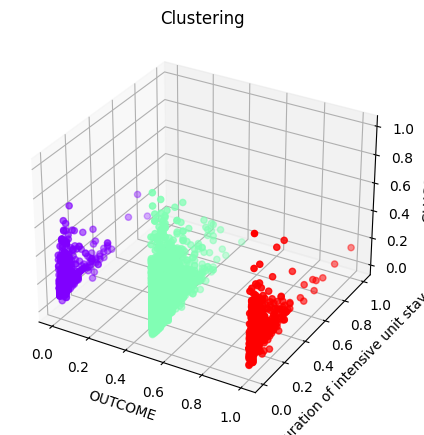

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df_clustering = train.copy()
df_clustering[np.isinf(df_clustering)] = 0
df_clustering = df_clustering[df_clustering['duration of intensive unit stay'] <= 0.50*1e8]


scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

X = df_scaled[['OUTCOME', 'duration of intensive unit stay', 'GLUCOSE']]

kmeans = KMeans(n_clusters=3)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('OUTCOME', 'duration of intensive unit stay', 'GLUCOSE'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = data_with_clusters['OUTCOME']
y = data_with_clusters['duration of intensive unit stay']
z = data_with_clusters['GLUCOSE']
cluster = data_with_clusters['Clusters']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Clustering")
plt.grid(False)
ax.set_xlabel('OUTCOME')
ax.set_ylabel('duration of intensive unit stay')
ax.set_zlabel('GLUCOSE')

plt.show()